# NAML project - Stroke prediction
###  Cavallini - Eusebio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_13028\130313570.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading the dataset

in this section we load the dataset and we plot some basic features.

In [2]:
df = pd.read_csv('resources/healthcare-dataset-stroke-data.csv')

In [3]:
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

cathegorical_features = ['work-type', 'smoking-status']
binary_features = ['hypertension', 'heart-disease', 'gender', 'ever-married', 'Residence-type']
numerical_features = ['age', 'avg-glucose-level', 'bmi']

df.columns = new_cols

In [4]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.drop('id', axis=1, inplace=True) # drop id column because it is not useful

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Data Pre-processing

The first step in the preprocessing is to remove the outliers.

In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart-disease          0
ever-married           0
work-type              0
Residence-type         0
avg-glucose-level      0
bmi                  201
smoking-status         0
stroke                 0
dtype: int64

As we can clearly see the BMI column presents some null values that we have removed.
In many cases, since the number of null values is high compared to the total number of samples, data imputation is also an option and this is what we have done in the other notebook.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart-disease        0
ever-married         0
work-type            0
Residence-type       0
avg-glucose-level    0
bmi                  0
smoking-status       0
stroke               0
dtype: int64

In the paper is clearly stated that only the patients above 18 years old were considered. We have removed the patients below 18 years old.

In [10]:
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart-disease      4073 non-null   int64  
 4   ever-married       4073 non-null   object 
 5   work-type          4073 non-null   object 
 6   Residence-type     4073 non-null   object 
 7   avg-glucose-level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking-status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


We filter out also the patients whose gender and smoking status are unknown. This to reduce the uncertainty in the data and also becuse it was done so in the paper. However, the Unknown cathegory accounts for a significant percentage of the data, so removing it could lead to a loss of information.

In [11]:
unknown_smokers_stroke = df[(df['smoking-status'] == 'Unknown') & (df['stroke'] == 1)].shape[0]
stroke_count = df[df['stroke'] == 1].shape[0]

In [12]:
print(f"Number of unknown smoking status people who had a stroke: {unknown_smokers_stroke/stroke_count*100:.2f}%")

Number of unknown smoking status people who had a stroke: 13.46%


From this stat, we can see that the unknown category accounts for 13.46% of the stroke cases. This is a significant percentage and we should be careful in removing it.

In [13]:
df = df[df['smoking-status'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3256 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3256 non-null   object 
 1   age                3256 non-null   float64
 2   hypertension       3256 non-null   int64  
 3   heart-disease      3256 non-null   int64  
 4   ever-married       3256 non-null   object 
 5   work-type          3256 non-null   object 
 6   Residence-type     3256 non-null   object 
 7   avg-glucose-level  3256 non-null   float64
 8   bmi                3256 non-null   float64
 9   smoking-status     3256 non-null   object 
 10  stroke             3256 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [14]:
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [15]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


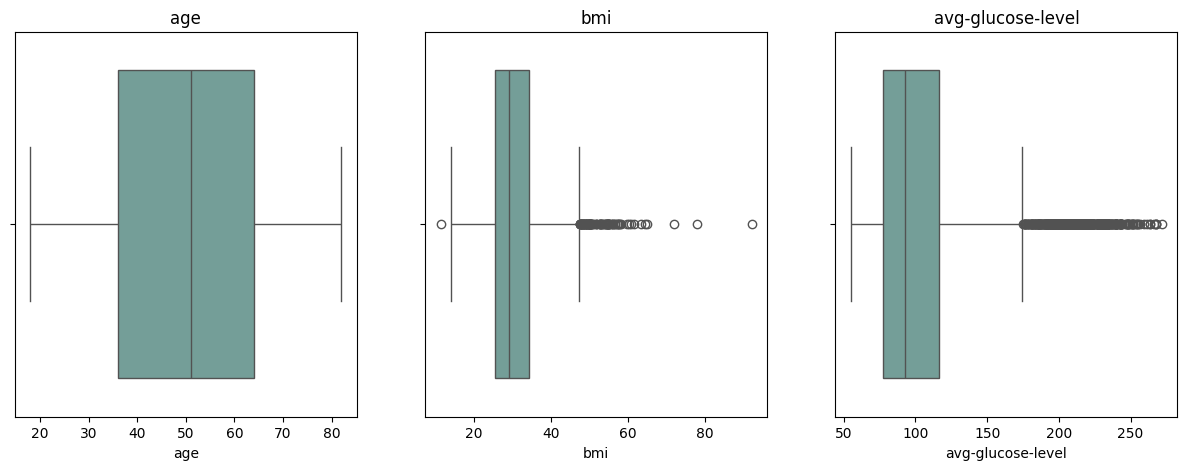

In [16]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [17]:
print(df[df['bmi'] < 12])

     gender   age  hypertension  heart-disease ever-married work-type  \
2187   Male  40.0             0              0          Yes   Private   

     Residence-type  avg-glucose-level   bmi smoking-status  stroke  
2187          Rural              60.96  11.5   never smoked       0  


In the paper, the autors have removed the single lowest bmi value. We have done the same.

In [18]:
df = df[df['bmi'] > 12]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


## Exploratory Data Analysis

In [19]:
stroke_count =df['stroke'].value_counts() # pandas serie, it contains the number of '1' (stroke) and the number of '0' (no stroke)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 5.53%


In [20]:
gender_count = df['gender'].value_counts()
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1260
Number of females:  1994


In [21]:
hypertension_count =df['hypertension'].value_counts()
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 12.54%


In [22]:
heart_disease_count =df['heart-disease'].value_counts()
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 6.33%


In [23]:
ever_married_count =df['ever-married'].value_counts()
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 79.84%


C:\Users\hp\AppData\Local\Temp\ipykernel_13028\140164340.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))


In [24]:
work_type_count =df['work-type'].value_counts()
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.03%
Self-employed percentage: 19.21%
Gov percentage: 15.67%
Never Worked fraction: 0.1%


C:\Users\hp\AppData\Local\Temp\ipykernel_13028\2819490883.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_13028\2819490883.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_13028\2819490883.py:4: FutureWarning: Series.__getitem__ 

In [25]:
residence_type_count =df['Residence-type'].value_counts()
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count['Urban']/(residence_type_count['Urban']+residence_type_count['Rural']))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count['Rural']/(residence_type_count['Urban']+residence_type_count['Rural']))))

Urban percentage: 51.14%
Rural pergentage: 48.86%


In [26]:
smoking_status_count =df['smoking-status'].value_counts()
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.64%
Formely Smoked fraction: 24.98%
Smokes fraction: 22.37%


C:\Users\hp\AppData\Local\Temp\ipykernel_13028\4037653718.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_13028\4037653718.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_13028\4037653718.py:4: FutureWarning: Series.__getite

The percentages showed above are exactly the same as the ones in the paper.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [28]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


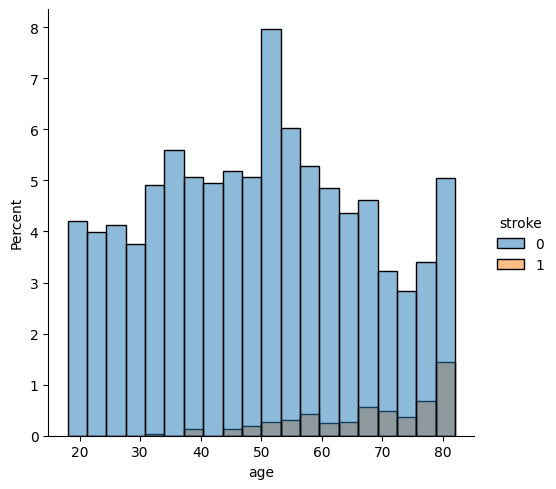

In [29]:
sns.displot(data = df, x='age', hue='stroke',  bins=20, kde=False, color='blue', stat='percent')

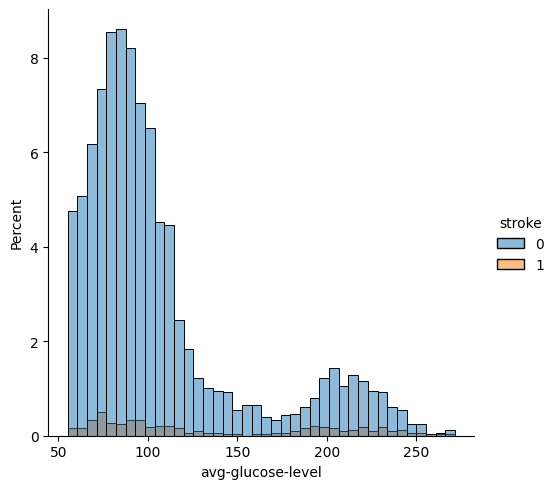

In [30]:
sns.displot(data = df, x='avg-glucose-level', hue='stroke', bins=40, kde=False, color='blue', stat='percent')

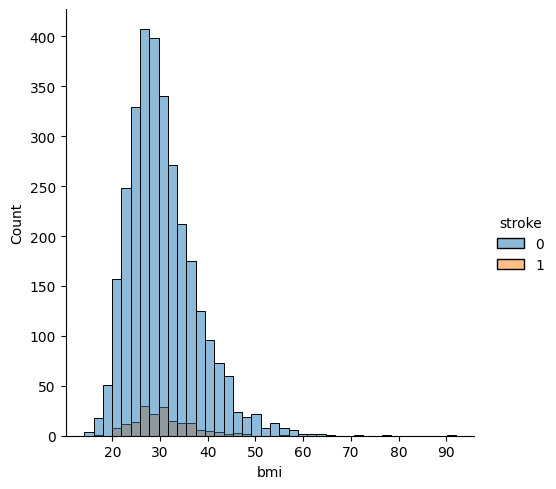

In [31]:
sns.displot(data=df, x='bmi', hue='stroke', bins=40, kde=False, color='blue')

showing the relation between BMI and age, and BMI and glucose level.

<AxesSubplot:xlabel='age', ylabel='avg-glucose-level'>

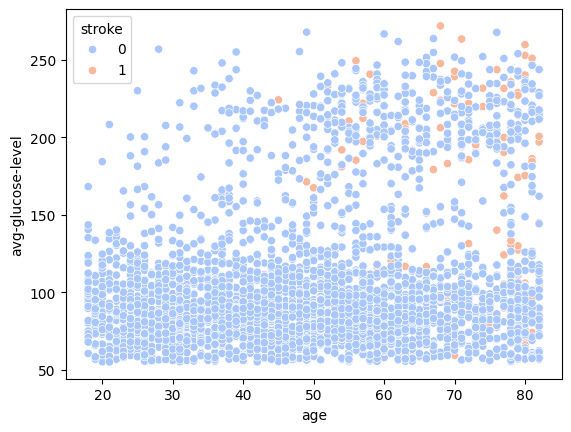

In [32]:
sns.scatterplot(data=df, x='age', y='avg-glucose-level', hue='stroke', palette='coolwarm')

<AxesSubplot:xlabel='age', ylabel='bmi'>

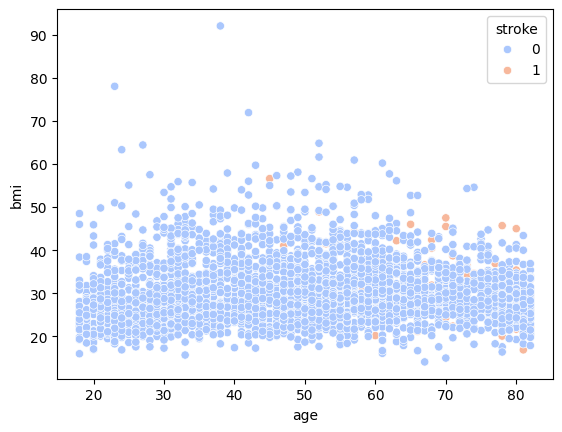

In [33]:
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', palette='coolwarm')

<AxesSubplot:xlabel='bmi', ylabel='avg-glucose-level'>

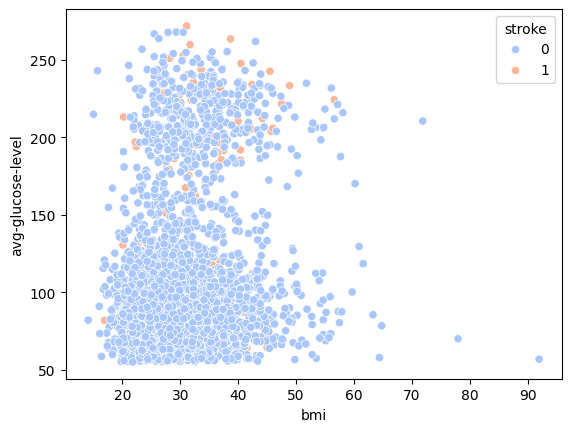

In [34]:
sns.scatterplot(data=df, x='bmi', y='avg-glucose-level', hue='stroke', palette='coolwarm')

### Oversampling

In [35]:
features = np.array(df.columns[:-1])
print(features)

X = df.drop(['stroke'], axis = 1) # Data
y = df['stroke'] # Target

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [36]:
y.value_counts()

stroke
0    3074
1     180
Name: count, dtype: int64

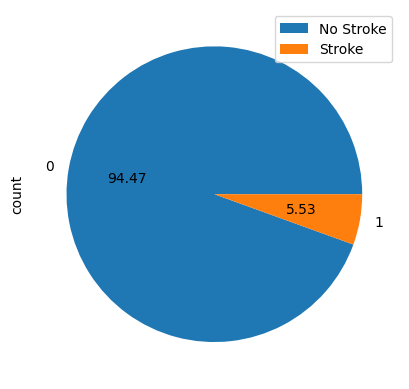

In [37]:
y.value_counts().plot.pie(autopct = "%.2f").legend(["No Stroke", "Stroke"])

We can clearly see that there is a disproportion between the number of smokers and non-smokers. This is a problem because the model could be biased towards the non-smokers. We will try to balance the dataset by oversampling the smokers.

In [38]:
X.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


Applying the oversampling SMOTE technique. To use this technique it is necessary to use only numerical features.
We have also augmented the whole dataset instead of just the training part, as it was done in the paper.

In [39]:
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

X_tmp = X.copy()
y_tmp = y.copy()

X_tmp['hypertension'] = X_tmp['hypertension'].replace({0: 'No', 1: 'Yes'})
X_tmp['heart-disease'] = X_tmp['heart-disease'].replace({0: 'No', 1: 'Yes'})

# one hot encoding features
features_one_hot_encoded  = cathegorical_features + binary_features


# Apply one hot encoding to cathegorical features
dummies = pd.get_dummies(X_tmp[features_one_hot_encoded], prefix_sep='__')
dummies_columns = dummies.columns

X_tmp = X_tmp.drop(features_one_hot_encoded, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)
tmp_features = X_tmp.columns

X_tmp[dummies_columns] = np.round(X_tmp[dummies_columns]).astype(int)

# Normalize the data
scaler = RobustScaler()
X_tmp = scaler.fit_transform(X_tmp, y_tmp)

# Apply SMOTE
#smote = SMOTENC(sampling_strategy='minority', categorical_features=['gender', 'hypertension', 'heart-disease', 'ever-married', 'work-type', 'Residence-type', 'smoking-status'])
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_tmp, y_tmp)

# # Inverse the normalization
X_smote = scaler.inverse_transform(X_smote)

# Reconstructing the dataframe
X_smote = pd.DataFrame(X_smote, columns=tmp_features)

# Averaging out the data that came from the SMOTE
X_smote[dummies_columns] = np.round(X_smote[dummies_columns]).astype(bool)

# inverse the one hot encoding
dummies = pd.from_dummies(X_smote[dummies_columns], sep='__')
X_smote.drop(columns=dummies_columns, inplace=True)
X_smote = pd.concat([X_smote, dummies], axis=1)

X_smote.describe()

,age,avg-glucose-level,bmi
count,6148.000000,6148.000000,6148.000000
mean,58.730795,122.187764,30.465798
std,17.093427,56.781808,6.413100
min,18.000000,55.120000,14.100000
25%,47.061687,80.075751,26.300000
50%,61.000000,98.424805,29.428470
75%,73.560602,167.464063,33.700000
max,82.000000,271.740000,92.000000


From the amount of values used, we can clearly see that the they match exactly the ones in the paper.

In [40]:
X_smote.head()

,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type
0,67.0,228.69,36.6,Private,formerly smoked,No,Yes,Male,Yes,Urban
1,80.0,105.92,32.5,Private,never smoked,No,Yes,Male,Yes,Rural
2,49.0,171.23,34.4,Private,smokes,No,No,Female,Yes,Urban
3,79.0,174.12,24.0,Self-employed,never smoked,Yes,No,Female,Yes,Rural
4,81.0,186.21,29.0,Private,formerly smoked,No,No,Male,Yes,Urban


In [41]:
# the balanced dataset is saved in new variables that will be used for plotting
X_balanced = X_smote.copy()
y_balanced = y_smote.copy()

# the dataset values are redefined to the balanced ones
X = X_smote.copy()
y = y_smote.copy()

# after oversampling the hypertension and heart-disease cathegory have become of type 'object'
# X['hypertension'] = X['hypertension'].astype(int)
# X['heart-disease'] = X['heart-disease'].astype(int)

In [42]:
df_balanced = X_balanced
df_balanced['stroke'] = y_balanced
df_balanced.head()

,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type,stroke
0,67.0,228.69,36.6,Private,formerly smoked,No,Yes,Male,Yes,Urban,1
1,80.0,105.92,32.5,Private,never smoked,No,Yes,Male,Yes,Rural,1
2,49.0,171.23,34.4,Private,smokes,No,No,Female,Yes,Urban,1
3,79.0,174.12,24.0,Self-employed,never smoked,Yes,No,Female,Yes,Rural,1
4,81.0,186.21,29.0,Private,formerly smoked,No,No,Male,Yes,Urban,1


In [43]:
df_balanced.describe()

,age,avg-glucose-level,bmi,stroke
count,6148.000000,6148.000000,6148.000000,6148.000000
mean,58.730795,122.187764,30.465798,0.500000
std,17.093427,56.781808,6.413100,0.500041
min,18.000000,55.120000,14.100000,0.000000
25%,47.061687,80.075751,26.300000,0.000000
50%,61.000000,98.424805,29.428470,0.500000
75%,73.560602,167.464063,33.700000,1.000000
max,82.000000,271.740000,92.000000,1.000000


### Graphs

<AxesSubplot:xlabel='stroke', ylabel='count'>

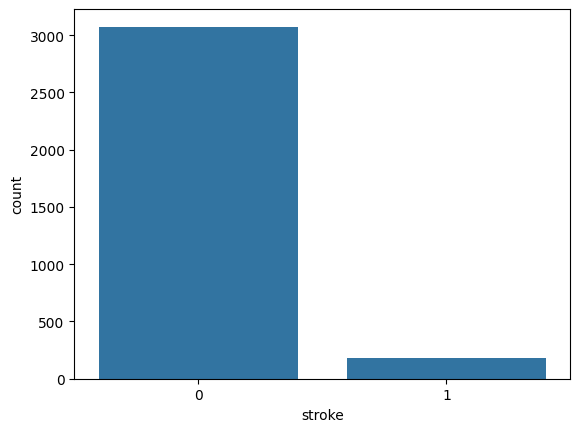

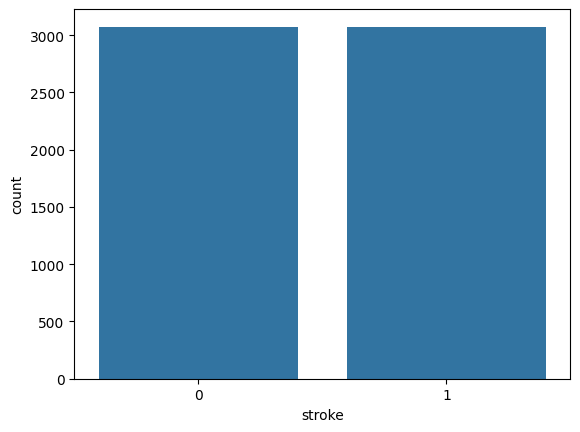

In [44]:
sns.countplot(x='stroke', data=df)
plt.figure()
sns.countplot(x='stroke', data=df_balanced)

<AxesSubplot:xlabel='bmi', ylabel='avg-glucose-level'>

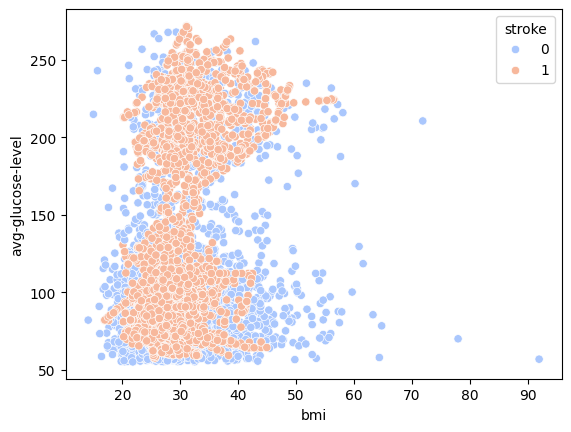

In [45]:
sns.scatterplot(data=df_balanced, x='bmi', y='avg-glucose-level', hue='stroke', palette='coolwarm')

<AxesSubplot:xlabel='age', ylabel='bmi'>

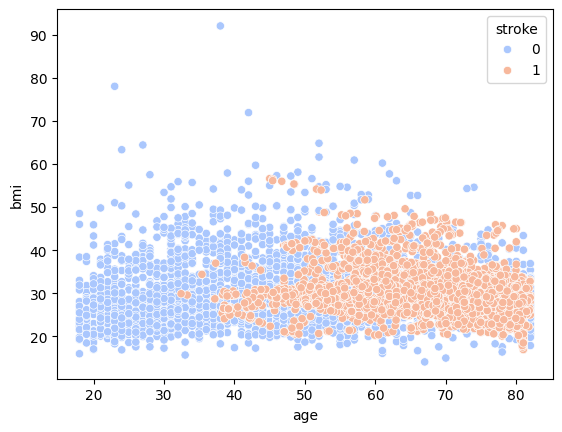

In [46]:
sns.scatterplot(data=df_balanced, x='age', y='bmi', hue='stroke', palette='coolwarm')

<AxesSubplot:xlabel='age', ylabel='avg-glucose-level'>

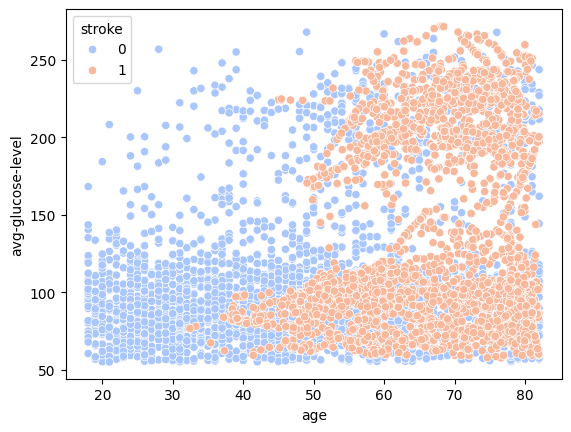

In [47]:
sns.scatterplot(data=df_balanced, x='age', y='avg-glucose-level', hue='stroke', palette='coolwarm')

We can clearly see that the dataset is now balanced. The stroke and non-stroke patients are now equally represented in the train dataset.

<AxesSubplot:xlabel='age_bucket', ylabel='percent'>

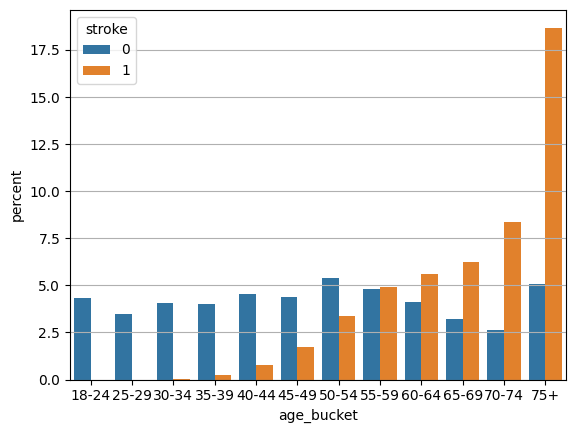

In [48]:
plt.grid()
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
dataset_bal_copy = df_balanced.copy()
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

In [49]:
mask = np.logical_and(df['stroke'] == 1, df['age'] >= 74)
stroke_eldery = df[mask]['age'].value_counts().sum()
print("Probability of stroke after 74y/o is {:.2f}%".format(100 *stroke_eldery/stroke_count[1]))

Probability of stroke after 74y/o is 42.78%


As also observed in the paper, the number of elderly patients who had a stroke is higher than the number of young patients who had a stroke.

<AxesSubplot:xlabel='hypertension', ylabel='percent'>

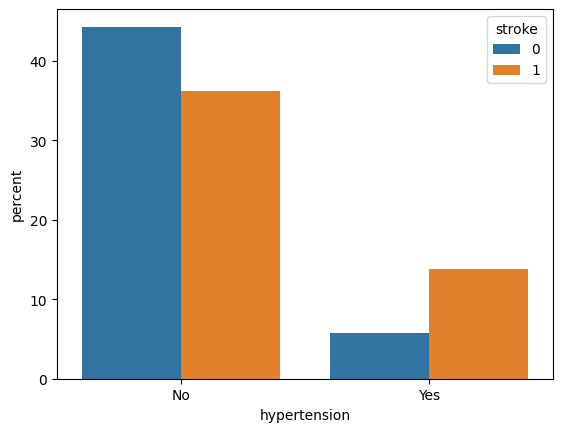

In [50]:
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='heart-disease', ylabel='percent'>

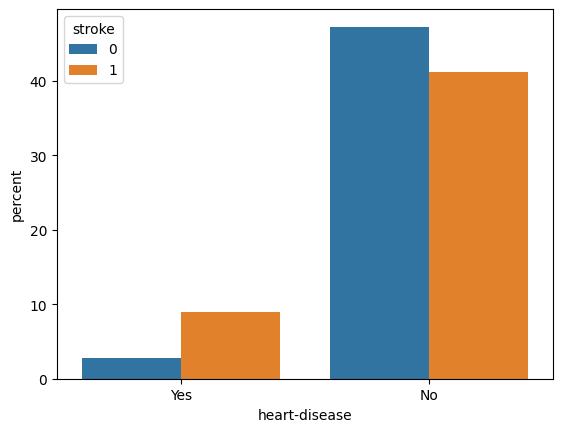

In [51]:
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

The fact that both the heart disesase class and the hypertension seem not to contribute significantly to the model is also observed in the paper. The authors explain it as a possible consequence of the lack of screening. When these simptoms are not found, they can not be acted on.

<AxesSubplot:xlabel='smoking-status', ylabel='percent'>

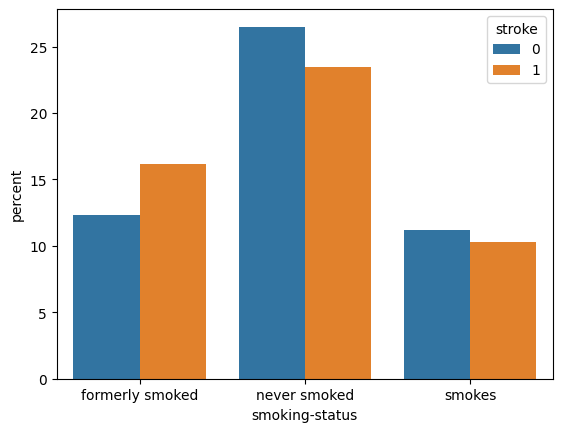

In [52]:
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='bmi_bucket', ylabel='percent'>

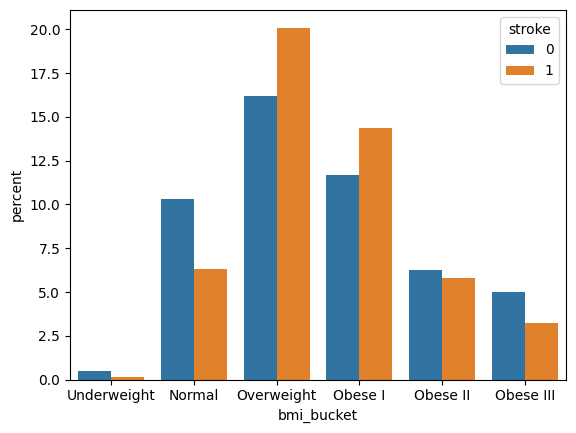

In [53]:
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

The BMI plot suggests that most of the patients that had suffered from a stroke are either overweight or obese.

<AxesSubplot:xlabel='Residence-type', ylabel='percent'>

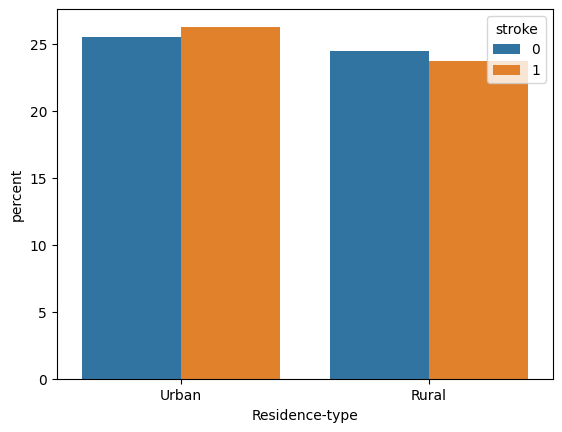

In [54]:
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

The urban residence seems to be more common among the patients that had a stroke. Although the difference is not very significant.

<AxesSubplot:xlabel='work-type', ylabel='percent'>

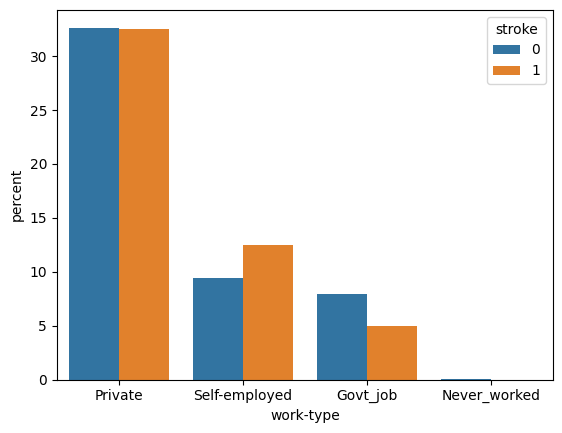

In [55]:
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

The private sector seems to have a higher percentage of stroke patients. This is also observed in the paper. However, we should also point out that the private sector also has a higher representation in the dataset.

<AxesSubplot:xlabel='gender', ylabel='percent'>

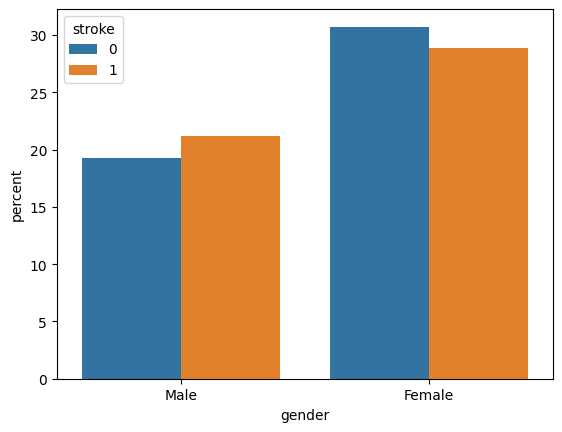

In [56]:
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')

The graphs visualized so far are similar to the ones in the paper. This indicatest that the data pre-processing was done correctly.

## Feature Ranking

Before applying the feature ranking, we split the dataset into train and test.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # the data is split into 80% training and 20% testing randomly

In [58]:
X_train.head()

,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type
3767,68.738384,148.131347,28.157212,Private,formerly smoked,No,No,Male,Yes,Urban
349,39.000000,84.790000,35.700000,Private,never smoked,No,No,Female,Yes,Rural
3009,19.000000,66.700000,24.700000,Private,never smoked,No,No,Female,No,Rural
3394,53.238409,87.969867,28.568943,Self-employed,smokes,No,No,Female,Yes,Urban
3879,59.062839,111.025778,32.003307,Private,formerly smoked,No,No,Male,Yes,Urban


### Apply the random forest classifier to select the most important features

We start with the preprocessing part, in which we on-hot encode the cathegorical feature, label encode the binary ones and scale the numerical ones.

In [59]:
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, MinMaxScaler

X_tmp = X.copy()
y_tmp = y.copy()

features_one_hot_encoded = cathegorical_features + binary_features

# Apply one hot encoding to cathegorical features
dummies = pd.get_dummies(X_tmp[features_one_hot_encoded]) 
X_tmp = X_tmp.drop(features_one_hot_encoded, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)

tmp_features = X_tmp.columns

# Normalize the data
scaler = MinMaxScaler()
X_tmp[numerical_features] = scaler.fit_transform(X_tmp[numerical_features])

We procede training the random forest classifier

{'heart-disease': 0.025718461369620957, 'ever-married': 0.026717571074147822, 'gender': 0.033854348194632226, 'hypertension': 0.03462151180195544, 'Residence-type': 0.03767073618995538, 'work-type': 0.04624804682450328, 'smoking-status': 0.05328346776108547, 'bmi': 0.16583878917227837, 'avg-glucose-level': 0.20874331036370075, 'age': 0.3673037572481202}


<BarContainer object of 10 artists>

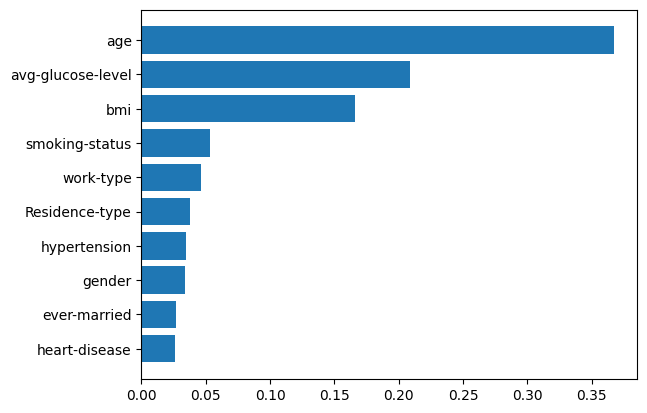

In [60]:
from sklearn.ensemble import RandomForestClassifier

dataset_features = df.columns[:-1]

rf_classifier = RandomForestClassifier(random_state=42)

importances = dict()
for f in dataset_features:
    importances[f] = 0

rf_classifier.fit(X_tmp, y_tmp)

feature_importance = list(zip(tmp_features, rf_classifier.feature_importances_))

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp
    

importances = dict(sorted(importances.items(), key=lambda item: item[1]))
print(importances)    
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])

We also compute the feature ranking using a mutual information classifier, which computes statistical dependencies between the features and the target.

{'gender': 0.010100823902930323, 'smoking-status': 0.017723372087859124, 'hypertension': 0.02145505386775426, 'Residence-type': 0.022364117760366398, 'work-type': 0.023857329477109612, 'ever-married': 0.038111422365543435, 'avg-glucose-level': 0.040018190124916364, 'heart-disease': 0.04271972883129105, 'bmi': 0.4207243878907041, 'age': 0.5293399274051134}


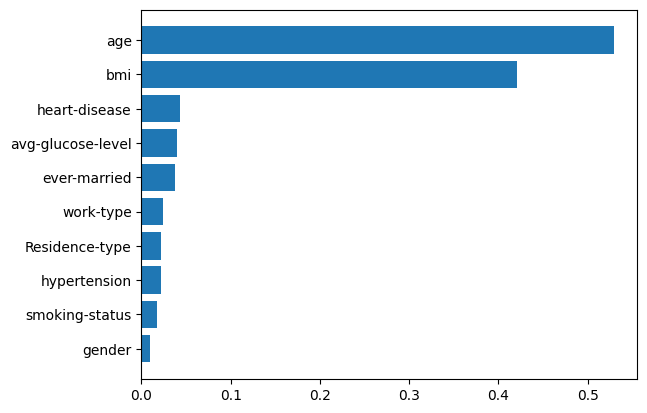

In [61]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(X_tmp, y_tmp, random_state=42)

feature_importance = list(zip(tmp_features, mi))
importances = dict()
for f in dataset_features:
    importances[f] = 0

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp


importances = dict(sorted(importances.items(), key=lambda item: item[1]))            
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])
print(importances)

Training a decision tree classifier and computing the feature importance, is used to implement the information gain method.

{'ever-married': 0.010455576592553997, 'heart-disease': 0.012245951881078904, 'hypertension': 0.021375610482086263, 'Residence-type': 0.023754382830062634, 'gender': 0.02635662875308131, 'work-type': 0.03256527516570303, 'smoking-status': 0.03755174254749297, 'bmi': 0.14814468534608652, 'avg-glucose-level': 0.1607197459468909, 'age': 0.5268304004549637}


<BarContainer object of 10 artists>

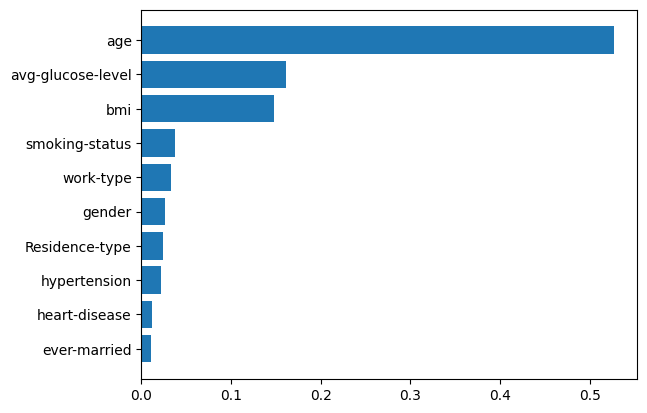

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy')

importances = dict()
for f in dataset_features:
    importances[f] = 0

dt_classifier.fit(X_tmp, y_tmp)

feature_importance = list(zip(tmp_features, dt_classifier.feature_importances_))

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp

importances = dict(sorted(importances.items(), key=lambda item: item[1]))
print(importances)    
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])

Both models predict Age to be the the most influent feature in the prediction of stroke. This is consistent with the paper. Both feature ranking algorithms seem to agree on the importance of BMI and glucose level.

## Model training

In this section we will train each model, as specified by the paper and we will compute the specified metrics.

In [62]:
# metrics list
confusion_matrices = dict()
cross_val_scores_mean = dict()
accuracy = dict()
precision = dict()
recall = dict()

F_metric = dict()
auc_score = dict()

In [63]:
print(X_train.shape)
X_train.head()

(4918, 10)


,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type
3767,68.738384,148.131347,28.157212,Private,formerly smoked,No,No,Male,Yes,Urban
349,39.000000,84.790000,35.700000,Private,never smoked,No,No,Female,Yes,Rural
3009,19.000000,66.700000,24.700000,Private,never smoked,No,No,Female,No,Rural
3394,53.238409,87.969867,28.568943,Self-employed,smokes,No,No,Female,Yes,Urban
3879,59.062839,111.025778,32.003307,Private,formerly smoked,No,No,Male,Yes,Urban


In [64]:
print(X_test.shape)
X_test.head()

(1230, 10)


,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type
1437,66.000000,152.020000,44.200000,Govt_job,formerly smoked,No,No,Female,Yes,Rural
1210,77.000000,222.850000,29.400000,Private,formerly smoked,No,No,Male,Yes,Urban
1073,53.000000,113.400000,35.100000,Govt_job,smokes,No,No,Male,Yes,Urban
5697,73.943856,84.465208,24.035964,Private,never smoked,No,No,Female,No,Urban
5412,60.191623,95.731389,34.252039,Private,smokes,No,Yes,Male,Yes,Urban


To tune the hyperparameters we will use the GridSearchCV method. In this way we are going to find the best hyperparameters for each model, and subsequently we will implement the models with the best hyperparameters and train the stacking and voting methods.

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import make_scorer

processor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('bool', OneHotEncoder(categories=[['Yes', 'No'], ['Yes', 'No'], ['Male', 'Female'], ['Yes', 'No'], ['Urban', 'Rural']]), binary_features),
        ('cat', OneHotEncoder(categories=[['Private', 'Self-employed', 'Govt_job', 'Never_worked'], ['smokes', 'never smoked', 'formerly smoked']]), cathegorical_features)])

scaler = ColumnTransformer(
    transformers=[
        ('num_scale', StandardScaler(), [1, 7, 8])
    ],
    remainder='passthrough')

grid_models = [
               ('Naive Bayes', GaussianNB(),[{'var_smoothing': [1e-08, 1e-07, 1e-06]}]),
               ('Logistic Regression', LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'max_iter':[1000]}]),
               ('SGD', SGDClassifier(), [{'loss': ['hinge', 'log_loss', 'modified_huber'],'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1]}]),
               ('KNN', KNeighborsClassifier(),[{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']}]), 
               ('Decision Tree', DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               ('Random Forest', RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               ('MLP', MLPClassifier(),[{'hidden_layer_sizes':[(10,),(20,), (25,)],'max_iter':[500],'learning_rate':['constant'], 'learning_rate_init':[0.003, 0.03, 0.3], 'momentum':[0.02,0.2], 'activation': ['relu', 'tanh']}])
               ]

# The scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}


# dictionary to store the trained models, with the best hyperparameters
models = dict()

for k, m, param_grid in grid_models:
    grid = GridSearchCV(estimator=m, param_grid = param_grid, scoring = scoring, cv = 10, refit='roc_auc') # f1 score is used as scoring metric, because it is the harmonic mean of precision and recall

    pipeline = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', grid)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results = grid.cv_results_
    best_accuracy = grid.best_score_
    best_param = grid.best_params_


    for scorer in scoring:
        best_index = results['rank_test_' + scorer].argmin()
        print(f"Best {scorer} score - cross validated: {results['mean_test_' + scorer][best_index]:.2f} (std: {results['std_test_' + scorer][best_index]:.2f})")

    cross_val_scores_mean[k] = best_accuracy

    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    accuracy[k] = accuracy_score(y_test, y_pred)
    precision[k] = precision_score(y_test, y_pred)
    recall[k] = recall_score(y_test, y_pred)
    F_metric[k] = f1_score(y_test, y_pred)
    auc_score[k] = roc_auc_score(y_test, y_pred)

    models[k] = pipeline  # save the model with the best hyperparameters
    
    print('Best Parameters : ',best_param)
    print('')
    
    print("10-fold cross validation score: ", cross_val_scores_mean[k])
    print("Accuracy: ", accuracy[k])
    print("Precision: ", precision[k])
    print("Recall: ", recall[k])
    print("F1 score: ", F_metric[k])
    print("AUC: ", auc_score[k])
    print('')
    print(classification_report(y_test, y_pred))
    print('----------------')
    print('')

Best accuracy score - cross validated: 0.72 (std: 0.01)
Best precision score - cross validated: 0.71 (std: 0.01)
Best recall score - cross validated: 0.90 (std: 0.01)
Best f1 score - cross validated: 0.75 (std: 0.01)
Best roc_auc score - cross validated: 0.72 (std: 0.01)
Best Parameters :  {'var_smoothing': 1e-06}

10-fold cross validation score:  0.7231799285880103
Accuracy:  0.7317073170731707
Precision:  0.7022556390977444
Recall:  0.7796327212020033
F1 score:  0.7389240506329114
AUC:  0.7329225412666118

              precision    recall  f1-score   support

           0       0.77      0.69      0.72       631
           1       0.70      0.78      0.74       599

    accuracy                           0.73      1230
   macro avg       0.73      0.73      0.73      1230
weighted avg       0.74      0.73      0.73      1230

----------------

Best accuracy score - cross validated: 0.76 (std: 0.02)
Best precision score - cross validated: 0.74 (std: 0.02)
Best recall score - cross va

Here are the results of the models, do not execute this portion if you have already executed the previous one

In [66]:
models_optimal = {
    'Naive Bayes': GaussianNB(var_smoothing=1e-07),
    'Logistic Regression': LogisticRegression(C=0.25, random_state=0, solver='liblinear', max_iter=1000),
    'SGD': SGDClassifier(alpha=0.1, loss='hinge', penalty='l2'),
    'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=200),
    'MLP': MLPClassifier(learning_rate='constant', learning_rate_init=0.003, momentum=0.2, activation='tanh', max_iter=500, hidden_layer_sizes=(25,))
}

In [67]:
# define the base models
base_models_stacking = [
    ('rf', RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0)),
    ('nb', GaussianNB(var_smoothing=1e-07)),
    ('dt1', DecisionTreeClassifier(criterion='gini', random_state=0)),
    ('dt2', DecisionTreeClassifier(criterion='entropy', random_state=0)),
]
base_models_voting = [
    ('rf', RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0)),
    ('dt1', DecisionTreeClassifier(criterion='gini', random_state=0)),
    ('dt2', DecisionTreeClassifier(criterion='entropy', random_state=0)),
]

# Define the meta-model for stacking
meta_model = LogisticRegression(C=0.75, random_state=0, solver='lbfgs', max_iter=500)

stacking = StackingClassifier(estimators=base_models_stacking, final_estimator=meta_model, cv=10)
voting = VotingClassifier(estimators=base_models_voting, voting='hard') # in the paper the voting is hard

pipeline_stack = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', stacking)
    ])

pipeline_vote = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', voting)
    ])


# Evaluating the stacking method
models['stacking'] = pipeline_stack.fit(X_train, y_train)

y_pred = pipeline_stack.predict(X_test)

cross_val_scores_mean['stacking'] = cross_val_score(pipeline_stack, X_train, y_train, cv=10).mean()

confusion_matrices['stacking'] = confusion_matrix(y_test, y_pred)
accuracy['stacking'] = accuracy_score(y_test, y_pred)
precision['stacking'] = precision_score(y_test, y_pred)
recall['stacking'] = recall_score(y_test, y_pred)
F_metric['stacking'] = f1_score(y_test, y_pred)
auc_score['stacking'] = roc_auc_score(y_test, y_pred)

print("Model: Stacking")
print("10-fold cross validation score: ", cross_val_scores_mean['stacking'])
print("Accuracy: ", accuracy['stacking'])
print("Precision: ", precision['stacking'])
print("Recall: ", recall['stacking'])
print("F1 score: ", F_metric['stacking'])
print("AUC: ", auc_score['stacking'])


# Evaluating the Majority voting
models['voting'] = pipeline_vote.fit(X_train, y_train)

y_pred = pipeline_vote.predict(X_test)

cross_val_scores_mean['voting'] = cross_val_score(pipeline_vote, X_train, y_train, cv=10).mean()

confusion_matrices['voting'] = confusion_matrix(y_test, y_pred)
accuracy['voting'] = accuracy_score(y_test, y_pred)
precision['voting'] = precision_score(y_test, y_pred)
recall['voting'] = recall_score(y_test, y_pred)
F_metric['voting'] = f1_score(y_test, y_pred)
auc_score['voting'] = roc_auc_score(y_test, y_pred)
print('---------------------------------------------')
print('')
print("Model: Majority Voting")
print("10-fold cross validation score: ", cross_val_scores_mean['voting'])
print("Accuracy: ", accuracy['voting'])
print("Precision: ", precision['voting'])
print("Recall: ", recall['voting'])
print("F1 score: ", F_metric['voting'])
print("AUC: ", auc_score['voting'])

Model: Stacking
10-fold cross validation score:  0.9566870332654446
Accuracy:  0.9609756097560975
Precision:  0.9479674796747968
Recall:  0.9732888146911519
F1 score:  0.9604612850082372
AUC:  0.9612878304834523
---------------------------------------------

Model: Majority Voting
10-fold cross validation score:  0.9335088503634527
Accuracy:  0.9341463414634147
Precision:  0.9124203821656051
Recall:  0.9565943238731218
F1 score:  0.9339853300733496
AUC:  0.934715545454786


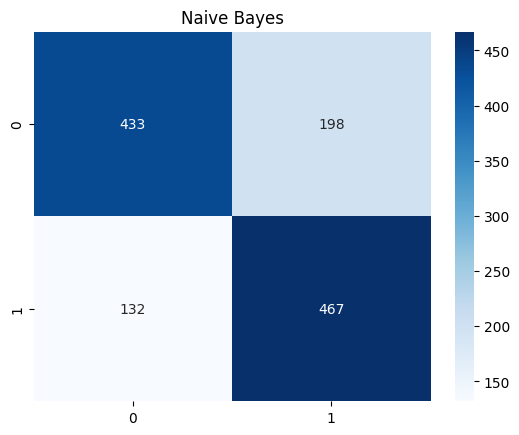

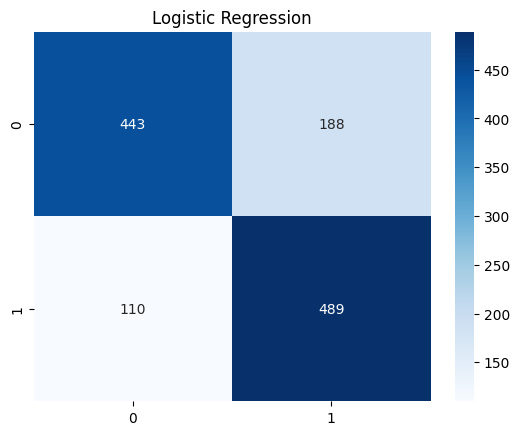

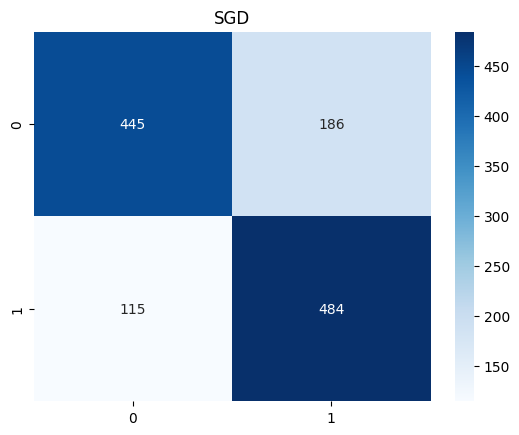

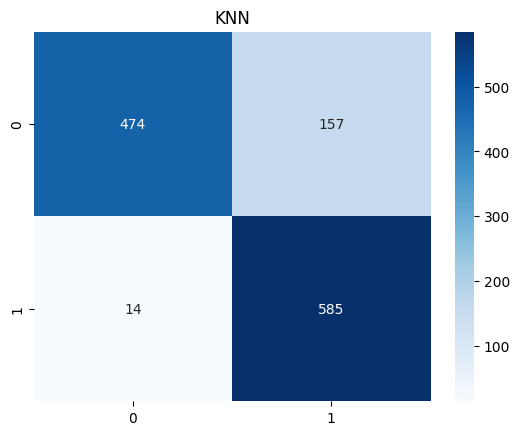

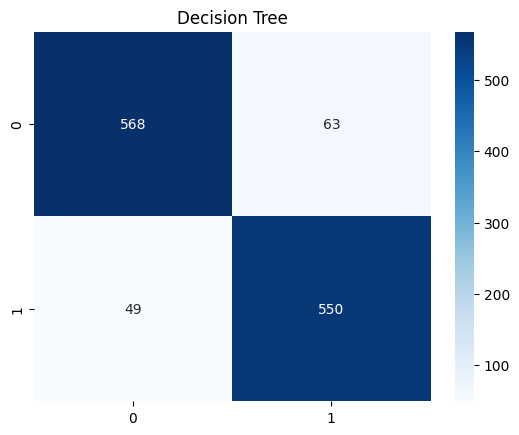

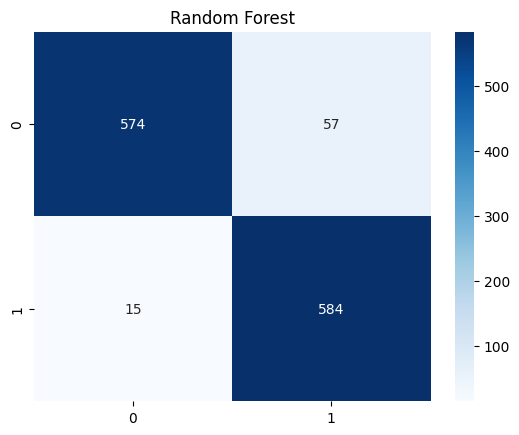

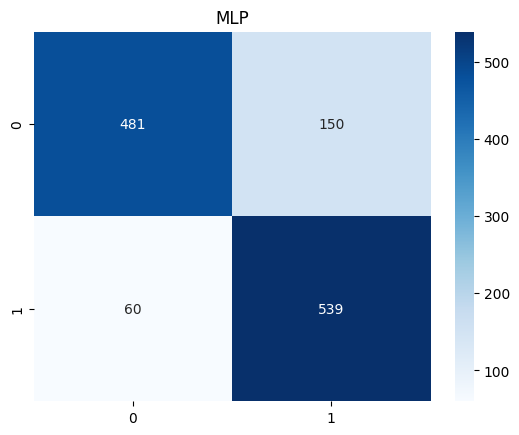

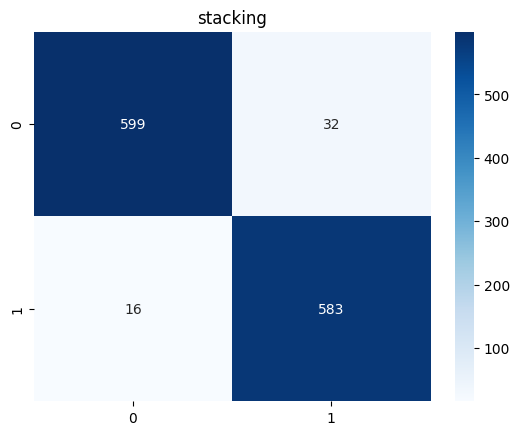

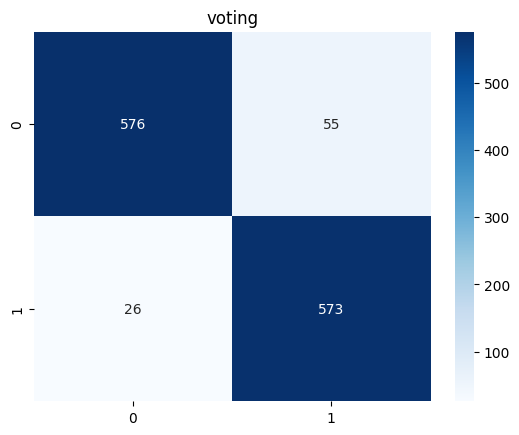

In [68]:
for k, m in confusion_matrices.items():
    plt.figure()
    plt.title(k)
    sns.heatmap(m, annot=True, fmt='d', cmap='Blues')

Text(0.5, 1.0, 'AUC')

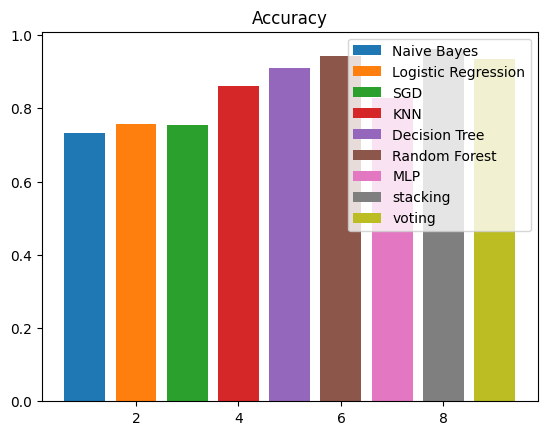

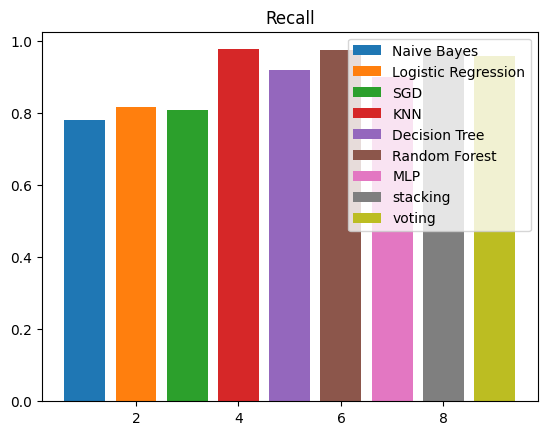

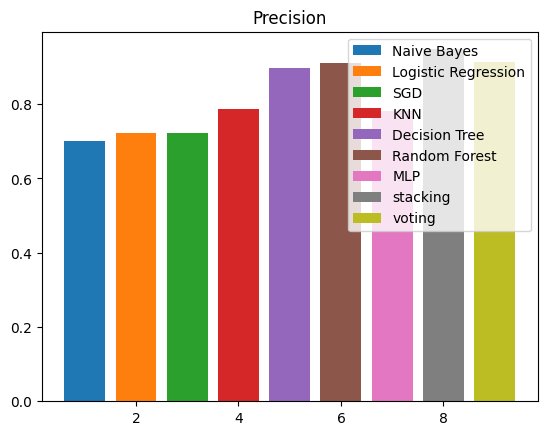

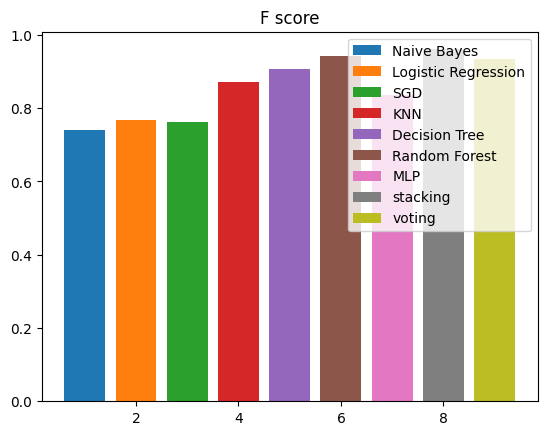

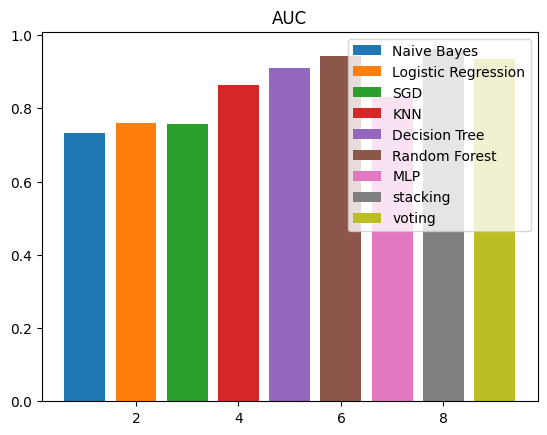

In [69]:
## Accuracy
plt.figure()
i=1
for k, v in accuracy.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Accuracy")

## Recall
plt.figure()
i=1
for k, v in recall.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Recall")

## Precision
plt.figure()
i=1
for k, v in precision.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Precision")

## F score
plt.figure()
i=1
for k, v in F_metric.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("F score")

## AUC
plt.figure()
i=1
for k, v in auc_score.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("AUC")

<AxesSubplot:>

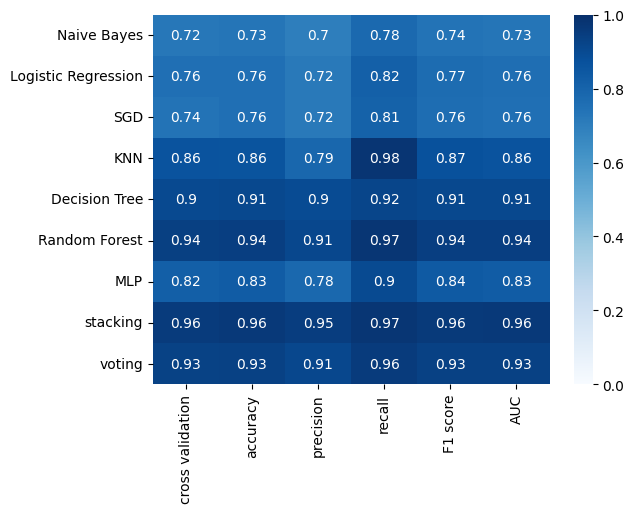

In [70]:
model_matrix = dict()

for k in models.keys():
    model_matrix[k] = list()
    model_matrix[k].append(cross_val_scores_mean[k])
    model_matrix[k].append(accuracy[k])
    model_matrix[k].append(precision[k])
    model_matrix[k].append(recall[k])
    model_matrix[k].append(F_metric[k])
    model_matrix[k].append(auc_score[k])


matrix = pd.DataFrame(model_matrix, index=['cross validation', 'accuracy', 'precision', 'recall', 'F1 score', 'AUC']).T

sns.heatmap(matrix, annot = True, vmin=0, vmax=1, cmap='Blues')